In [8]:
import pandas as pd
from pathlib import Path
import re
import unicodedata
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,5)

DATA_DIR = Path("../data/corpora")
OUTPUT_DIR = Path("../logs/corpora_cleaned")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

CORPORA = {
    "sa_en_itihasa": DATA_DIR / "sa_en_itihasa",
    "hi_en_general": DATA_DIR / "hi_en_general",
    "ta_en_general": DATA_DIR / "ta_en_general"
}

print(" Corpora directories found:")
for name, path in CORPORA.items():
    print(f" - {name}: {path.exists()}")

 Corpora directories found:
 - sa_en_itihasa: True
 - hi_en_general: True
 - ta_en_general: True


In [9]:
def normalize_text(text):
    """Normalize and clean Unicode text (remove zero-width chars, normalize diacritics)."""
    text = unicodedata.normalize("NFC", text)
    text = re.sub(r"[\u200b\u200c\u200d]", "", text)
    text = text.strip()
    return text

def clean_parallel_data(src_lines, tgt_lines):
    """keep only aligned sentence pairs with both sides non-empty."""
    cleaned = [
        (normalize_text(s), normalize_text(t))
        for s, t in zip(src_lines, tgt_lines)
        if s.strip() and t.strip()
    ]
    return pd.DataFrame(cleaned, columns=["source", "target"])
    

In [10]:
sa_path = CORPORA["sa_en_itihasa"]
sa_src = open(sa_path / "train.sn", encoding="utf-8").read().splitlines()
sa_tgt = open(sa_path / "train.en", encoding="utf-8").read().splitlines()

df_sa = clean_parallel_data(sa_src, sa_tgt)
print(f" Loaded Sanskrit-English corpus: {len(df_sa)} pairs")

df_sa.head(10)

 Loaded Sanskrit-English corpus: 75161 pairs


,source,target
0,ॐ तपः स्वाध्यायनिरतं तपस्वी वाग्विदां वरम्। ना...,"The ascetic Vālmīki asked Nārada, the best of ..."
1,कोन्वस्मिन् साम्प्रतं लोके गुणवान् कश्च वीर्यव...,Who at present in this world is like crowned w...
2,चारित्रेण च को युक्तः सर्वभूतेषु को हितः। विद्...,"Who is qualified by virtue of his character, a..."
3,आत्मवान् को जितक्रोधो द्युतिमान् कोऽनसूयकः। कस...,"Who has subdued his heart, and controlled his ..."
4,एतदिच्छाम्यहं श्रोतुं परं कौतूहलं हि मे। महर्ष...,I have great curiosity to hear of such a perso...
5,श्रुत्वा चैतत्रिलोकज्ञो वाल्मीकेर्नारदो वचः। श...,"Hearing Vālmīki's words, Nărada, cognizant of ..."
6,बहवो दुर्लभाश्चैव ये त्वया कीर्तिता गुणाः। मुन...,"Rare as are the qualities mentioned by you, I ..."
7,इक्ष्वाकुवंशप्रभवो रामो नाम जनैः श्रुतः। नियता...,"There is one sprung from the line of Ikşvāku, ..."
8,बुद्धिमान् नीतिमान् वाग्मी श्रीमाञ्छत्रुनिबर्ह...,He is intelligent; learned in morality; eloque...
9,महोरस्को महेष्वासो गूढजत्रुररिंदमः। आजानुबाहुः...,And a broad chest; a powerful bowman; the repr...


In [13]:
# Hindi–English corpus
hi_path = CORPORA["hi_en_general"]
hi_src = open(hi_path / "train-00000-of-00001.csv", encoding="utf-8").read().splitlines()
# Many are CSVs; if so, use pandas read_csv directly
try:
    df_hi = pd.read_csv(hi_path / "train-00000-of-00001.csv")
    df_hi.columns = ["english", "hindi"]
except:
    df_hi = clean_parallel_data([], [])
print(f"✅ Loaded Hindi–English corpus: {len(df_hi)} entries")

# Tamil–English corpus
ta_path = CORPORA["ta_en_general"]
ta_src = open(ta_path / "data.ta1", encoding="utf-8").read().splitlines()
ta_tgt = open(ta_path / "data.en1", encoding="utf-8").read().splitlines()
df_ta = clean_parallel_data(ta_src, ta_tgt)
print(f"✅ Loaded Tamil–English corpus: {len(df_ta)} pairs")



✅ Loaded Hindi–English corpus: 0 entries
✅ Loaded Tamil–English corpus: 50000 pairs


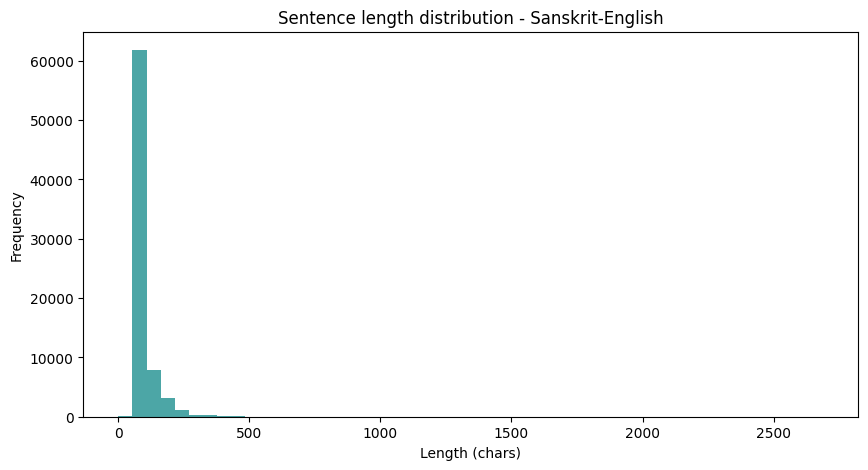

                                                  source  \
21108  आशीभिर्वर्धयित्वा च तमुवाचास्यतामिति। निषसादाभ...   
19683  भवन्तः सुहृदोऽस्माकमस्मान् कृत्वा प्रदक्षिणम्।...   
35134  नैव देवा न गन्धर्वा नासुरा न च राक्षसाः। शक्ता...   
3305   विष्णोः पदं प्रेक्ष्यमाणा विपाशां चापि शाल्मली...   
59420  कोष्ठागारं च ते नित्यं ज्ञफीतैर्धान्यैःसुसंवृत...   

                                                  target  
21108  Uttering benedictions on him, he (the Rishi) a...  
19683  "You are our friends; walking round us and mak...  
35134  Neither the gods and Gandharvas, nor the Asura...  
3305   There seeing the foot-print of Visnu, they des...  
59420  Let your barns, O king, be filled with corn. A...  


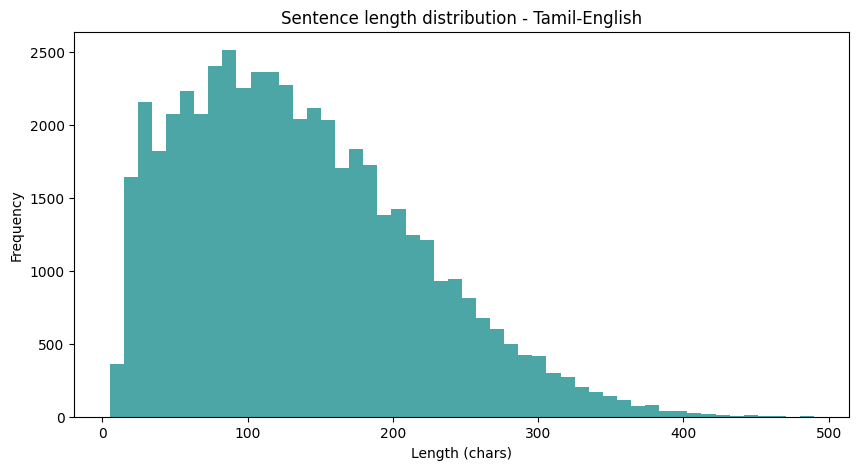

                                                  source  \
12629  வரக்கூடிய மாதங்களில் அவங்கள சிறப்பான நிலைக்கு ...   
21654  கலைத் துறையில் அவரது வெற்றிகளுக்காக , 1990ல் அ...   
9835   பெப்ரவரி 28 ல் அரசாங்க வழக்குரைஞர் ஷரோன் மீது ...   
25395  டோரொன்டோ குளோப் அன்ட் மெயில் பத்திரிகைக்கு அவர...   
38531  இரண்டாவது ஹீரோவாக இந்தி நடிகர் சமீர் நடித்துள்...   

                                                  target  
12629    i 'm going to be leading them to great things .  
21654  in 1990 the city of new orleans in the us awar...  
9835   on february 28 , the state prosecutor recommen...  
25395  he told the toronto globe and mail , ' from th...  
38531        sameer has agreed to play the second hero .  


In [24]:
def corpus_stats(df, name):
    lengths = df["source"].apply(len)
    plt.hist(lengths, bins=50, color="teal", alpha=0.7)
    plt.title(f"Sentence length distribution - {name}")
    plt.xlabel("Length (chars)")
    plt.ylabel("Frequency")
    plt.show()
    print(df.sample(5))

corpus_stats(df_sa, "Sanskrit-English")
corpus_stats(df_ta, "Tamil-English")
    

In [25]:
def split_and_save(df, name):
    train, test = train_test_split(df, test_size=0.1, random_state=42)
    val, test = train_test_split(test, test_size=0.5, random_state=42)
    
    for subset, data in zip(["train", "val", "test"], [train, val, test]):
        out_path = OUTPUT_DIR / f"{name}_{subset}.csv"
        data.to_csv(out_path, index=False, encoding="utf-8")
        print(f"💾 Saved: {out_path}")

split_and_save(df_sa, "sa_en")
split_and_save(df_ta, "ta_en")


💾 Saved: ../logs/corpora_cleaned/sa_en_train.csv
💾 Saved: ../logs/corpora_cleaned/sa_en_val.csv
💾 Saved: ../logs/corpora_cleaned/sa_en_test.csv
💾 Saved: ../logs/corpora_cleaned/ta_en_train.csv
💾 Saved: ../logs/corpora_cleaned/ta_en_val.csv
💾 Saved: ../logs/corpora_cleaned/ta_en_test.csv


In [26]:
from datasets import Dataset, DatasetDict

def to_hf_dataset(df):
    return Dataset.from_pandas(df)

ds_sa = DatasetDict({
    "train": to_hf_dataset(df_sa.sample(frac=0.9)),
    "validation": to_hf_dataset(df_sa.sample(frac=0.1))
})

print(ds_sa)
ds_sa["train"][0]


DatasetDict({
    train: Dataset({
        features: ['source', 'target', '__index_level_0__'],
        num_rows: 67645
    })
    validation: Dataset({
        features: ['source', 'target', '__index_level_0__'],
        num_rows: 7516
    })
})


{'source': 'सम्परिष्वज्य वैदेही वामेनाङ्केन रावणः। तलेनाभिजघाना” जटायुं क्रोधमूछितः॥',
 'target': 'Beside himself with anger, Ravana, holding Jānaki fast by her left flank, struck Jațāyu with his palms.',
 '__index_level_0__': 5466}

In [28]:
import os

HF_OUT = "../logs/hf_datasets"
os.makedirs(HF_OUT, exist_ok=True)

ds_sa.save_to_disk(f"{HF_OUT}/sa_en")
ds_ta = Dataset.from_pandas(df_ta)
ds_ta.save_to_disk(f"{HF_OUT}/ta_en")

print(f"📦 Hugging Face datasets saved at: {HF_OUT}")


Saving the dataset (0/1 shards):   0%|          | 0/67645 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/7516 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/50000 [00:00<?, ? examples/s]

📦 Hugging Face datasets saved at: ../logs/hf_datasets
